In [31]:
from typing import Dict, Union, Iterable, Sequence, Tuple, TYPE_CHECKING, List
import os

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager
import datetime
import seaborn as sns

from torch import Tensor

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Use relative path in WSL issues
main_outdir = "../imgs"

In [6]:

def cm_image_creator(
        cm: np.ndarray,
        display_labels_x: Sequence = None,
        display_labels_y: Sequence = None,
        ylabel="True label",
        xlabel="Predicted label",
        include_values=False,
        xticks_rotation=0,
        yticks_rotation=0,
        values_format=None,
        cmap="viridis",
        image_title="",
        format_fn=None,
    vmin=None,vmax=None,
    text_cmap=None
):
    """
    The default Confusion Matrix image creator.
    Code adapted from
    `Scikit learn <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html>`_ # noqa
    :param confusion_matrix_tensor: The tensor describing the confusion matrix.
        This can be easily obtained through Scikit-learn `confusion_matrix`
        utility.
    :param display_labels: Target names used for plotting. By default, `labels`
        will be used if it is defined, otherwise the values will be inferred by
        the matrix tensor.
    :param include_values: Includes values in confusion matrix. Defaults to
        `False`.
    :param xticks_rotation: Rotation of xtick labels. Valid values are
        float point value. Defaults to 0.
    :param yticks_rotation: Rotation of ytick labels. Valid values are
        float point value. Defaults to 0.
    :param values_format: Format specification for values in confusion matrix.
        Defaults to `None`, which means that the format specification is
        'd' or '.2g', whichever is shorter.
    :param cmap: Must be a str or a Colormap recognized by matplotlib.
        Defaults to 'viridis'.
    :param image_title: The title of the image. Defaults to an empty string.
    :return: The Confusion Matrix as a PIL Image.
    """
    if text_cmap is None:
        text_cmap = cmap
        
    fig, ax = plt.subplots()

    n_classes = cm.shape[0]
    im_ = ax.imshow(cm, interpolation="nearest", cmap=cmap, vmin=vmin,vmax=vmax)
    cmap_min, cmap_max = im_.cmap(0), im_.cmap(256)

    if include_values:
        text_ = np.empty_like(cm, dtype=object)

        # print text with appropriate color depending on background
#         if vmin is not None:
#             thresh = (vmin + vmax) / 2.0
#         else:
        thresh = (cm.max() + cm.min()) / 2.0

        for i in range(n_classes):
            for j in range(n_classes):
                text_color = cmap_max if cm[i, j] < thresh else cmap_min

                if format_fn is not None:
                    text_cm = format_fn(cm[i, j])
                else:
                    if values_format is None:
                        text_cm = format(cm[i, j], ".2g")
                        if cm.dtype.kind != "f":
                            text_d = format(cm[i, j], "d")
                            if len(text_d) < len(text_cm):
                                text_cm = text_d
                    else:
                        text_cm = format(cm[i, j], values_format)

                text_[i, j] = ax.text(
                    j, i, text_cm, ha="center", va="center", color=text_color
                )

    if display_labels_x is None:
        display_labels_x = np.arange(n_classes)

    if display_labels_y is None:
        display_labels_y = np.arange(n_classes)
    bar = fig.colorbar(im_, ax=ax)
    # fig.set_clim(-4, 4)

    ax.set(
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=display_labels_x,
        yticklabels=display_labels_y,
        ylabel=ylabel,
        xlabel=xlabel,
    )

    if image_title != "":
        ax.set_title(image_title)

    ax.set_ylim((n_classes - 0.5, -0.5))
    plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)
    plt.setp(ax.get_yticklabels(), rotation=yticks_rotation)

    fig.tight_layout()
    return fig

In [19]:
action_matrix = [
[2.081413996400598, -2.880795971615108, -1.9594197978144103, -3.199649716646243, -1.8543583713955696,
-2.640163097288702, -2.060456075650804, -3.2732961274959425, -2.822945626385241,
-3.6813338560537554],
[-9.421296714152964, 3.061843715842784, -7.577432342197584, -8.422547290264031, -7.928751238174253,
-8.318088373580537, -7.920421254547203, -15.167433886174802, -8.157267639435917,
-10.277983964329035],
[-0.5976383561653702, -4.535211124758082, 2.108799910027048, -3.2867296451177355, -2.83788559866416,
-0.10243354628096411, -2.843937363694696, -9.770409943439342, -1.767255392993789,
-6.149862957672334],
[-4.105442802186709, -2.6651809262478445, -3.0763892146124356, 0.9927033628790808,
-1.6815314474817995,
-2.7214512399264743, -2.498504734652884, -7.118259722215158, -2.3163531834820668,
-6.308244058783625],
[-3.0996613167721137, -2.663877768779364, -6.087268762830375, -4.90565177721855, 0.6025475993701075,
-5.612693593228534, -6.210860045078923, -6.652103794062579, -4.753654950498098, -8.782459003824583],
[-6.185985238095162, -2.5978895613527673, 0.9446554183096124, -3.555774347598736, -4.117571932928903,
0.5209743261369534, -5.734176843920174, -8.439023250120657, -2.1303031328212785, -6.149305729798868],
[-2.9931404680942326, -5.397105882486959, -2.741095343188963, -3.0595107200818186, -4.071744306133939,
-3.691512955731644, -0.29825229892389915, -3.2611771963260794, -4.012082271690828,
-4.615693110815229],
[-6.894551916411977, -10.409222554972793, -7.680059782663981, -6.2992036715531965, -7.277710449966517,
-8.26941203193747, -5.890942955280051, 2.8075175176613913, -8.59732266793768, -5.475754326498005],
[-1.1646448419035274, -3.887442255583335, -0.6440077325572138, -1.8848401791010148,
-2.238114035555294,
-0.31980896021896627, -2.2220188786878303, -2.0454460859298704, 2.22888431441353,
-2.615165626499014],
[-4.255323515445051, -2.6853705048561096, -3.372339105606079, -2.2747328562614246, -2.113691991606316,
-3.4207833213207524, -2.2679048137848867, -3.1275054005699023, -3.296013070301837,
-0.3868209989610272]]

verb_matrix = [
[0.5556482316102599, -0.785497115704957, -0.46440466525761975, -0.999702576184884, -0.6502350910185751,
-0.9130738480782612, -0.794621710145079, -1.7714399929399844, -1.1350068109581268,
-1.7594339141202435],
[-3.672292403330712, 0.4818049740984919, -2.3140520116773207, -2.067571838514115, -1.9888900915964345,
-2.0482233574805937, -2.9546146514848637, -5.187072794056601, -2.663603109839451, -3.3158227196914263],
[-0.3627949135353262, -0.5003585598365529, 0.5572715455207272, -0.003363486436697151,
-0.49007379147526503,
-0.142386857823376, -0.8105158527546069, -3.625618418499275, -0.7774140719907829, -1.598791433052278],
[-1.4264968861975975, -0.08045098898331011, -0.6785737619451855, 0.2692277534267841,
-0.3745945846516784,
-0.22765875280354964, -0.6810692518072969, -3.618340552501656, -0.44012864574969535,
-2.2699575599112456],
[-2.179538010342128, 0.14592530340777607, -2.5546615385490914, -1.5538320692876977, -0.3653148476366262,
-1.2423748428131014, -2.9638183679678205, -2.8796317708988983, -2.096390912547169, -3.468197981918782],
[-2.204315623604256, -0.06160246410707789, -0.2050682685729386, -0.505396375251122, -0.6388111234787707,
0.000698297151497436, -2.1150585560895063, -3.6505362704948143, -1.0504278344741786,
-1.9017332213550384],
[-2.3392308410348224, -3.0557400345706975, -1.662298083499722, -1.853762456698295, -2.3963449402283667,
-2.138893466058804, -1.0892648088154573, -2.270388059262876, -2.508686872826979, -3.587733072858349],
[-2.276894988834971, -2.280048993042135, -1.9193481675092725, -1.3361527510178397, -1.3780892172513843,
-1.3610375262313077, -1.640775166451931, 1.724456245614069, -1.7956609315900918, -1.5004955678784722],
[-0.9115007734615392, -0.5796039727494473, -0.595237862545511, -0.6737126558254927, -0.8852560895603973,
-0.3585968063378231, -0.8893705121077159, -0.38341422610812714, 0.436455765824361, -1.049639193944528],
[-1.9454442212900211, -0.6517259833498263, -1.5332056555843008, -0.926185839265012, -0.8392252644233695,
-1.4183307374007113, -1.045220585700864, -1.7843682662273446, -1.5862944928704794,
-0.5123643874023504]]

noun_matrix = [
[1.5257657730290968, -2.0952988325610873, -1.4950151443481443, -2.19994712915176, -1.2041232807489184,
-1.7270892399214046, -1.2658343881587772, -1.5018561391918748, -1.6879387791616371,
-1.9218999783862645],
[-5.749004341591242, 2.580038722033178, -5.263380369932755, -6.3549754625711685, -5.939861123728288,
-6.269865011885052, -4.9658066335627264, -9.980361075092246, -5.493664536346873, -6.962161232468108],
[-0.2348434562163968, -4.034852560345582, 1.551528378975564, -3.283366147677104, -2.347811793545624,
0.03995332663709467, -2.0334215228555395, -6.144791544146008, -0.989841278346188,
-4.5510715468668606],
[-2.6789459240900273, -2.584729928904631, -2.397815444504005, 0.7234755798959388, -1.3069368605683376,
-2.493792487429334, -1.8174354643287027, -3.4999191683751567, -1.8762245001563107,
-4.038286513425935],
[-0.9201232962578932, -2.809803074973775, -3.5326071775369887, -3.3518197053518053, 0.96786244092975,
-4.370318748040762, -3.2470416592105344, -3.772472051558671, -2.6572640317750262,
-5.314261054069224],
[-3.9816696193401455, -2.5362871080402316, 1.1497236843126408, -3.0503779710867467,
-3.4787607921118084, 0.5202760117781626, -3.6191182832288393, -4.788486987793887, -1.079875286251127,
-4.2475725063975425],
[-0.6539096404938243, -2.341365848469922, -1.0787972607474396, -1.2057482382807976,
-1.6753993697174183, -1.5526194749198434, 0.7910125116027183, -0.990789178620886, -1.503395367889519,
-1.0279600736357166],
[-4.617656939594071, -8.129173529664362, -5.7607116111810655, -4.963050947128198, -5.8996212653718985,
-6.908374527445087, -4.250167790471631, 1.0830612479370223, -6.801661713654736, -3.9752588058021705],
[-0.2531440621365632, -3.30783829186845, -0.04876985411713089, -1.2111275383295157,
-1.352857940310201, 0.038787841022788705, -1.3326483946293592, -1.6620318834428434,
1.7924285612731097, -1.565526400443534],
[-2.3098793045336654, -2.0336445253195725, -1.8391334402388424, -1.3485470515031082,
-1.274466748651746, -2.002452600569952, -1.2226842468714012, -1.3431371666025371, -1.709718565122191,
0.12554335161309008]]

In [20]:
action_matrix = np.array(action_matrix, dtype=float)
verb_matrix = np.array(verb_matrix, dtype=float)
noun_matrix = np.array(noun_matrix, dtype=float)

[3.061843715842784, 1.724456245614069, 2.580038722033178]
1.724456245614069


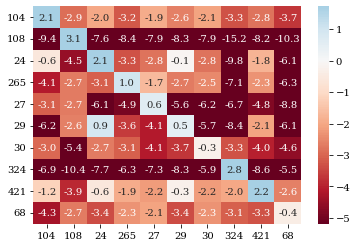

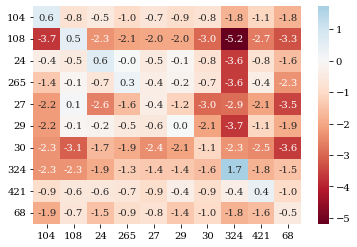

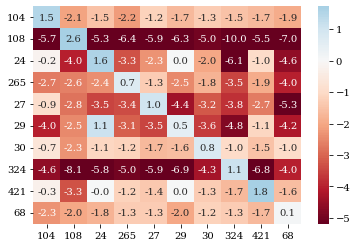

In [32]:
cmap = sns.color_palette('RdBu', as_cmap=True) # "gist_heat"
modes = ['action', 'verb', 'noun']

# Paths
title = "avg_AG_transfer_eval"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)
filename = f"{{}}_{title}.pdf"

os.makedirs(parent_dirpath, exist_ok=True)


maxes = [a.max() for a in [action_matrix, verb_matrix, noun_matrix]]
print(maxes)
vmax = min(maxes)
print(vmax)
mins = [a.min() for a in [action_matrix, verb_matrix, noun_matrix]]
vmin = max(mins)
# vmin = -vmax

for mode in modes:
    if mode == "action":
        # TRANSFER_MATRIX/avg_AG/pred_action_batch/loss
        # matrix = [[-4.319421209013213,null,null,null,null,null,null,null,null,null],[null,-21.00615071993479,null,null,null,null,null,null,null,null],[null,null,1.7079791380011518,null,null,null,null,null,null,null],[null,null,null,-9.572440371261193,null,null,null,null,null,null],[null,null,null,null,-5.487690441165265,null,null,null,null,null],[null,null,null,null,null,-0.09211561922387128,null,null,null,null],[null,null,null,null,null,null,0.06582317764268202,null,null,null],[null,null,null,null,null,null,null,2.0436283127577215,null,null],[null,null,null,null,null,null,null,null,-15.469999925127638,null],[null,null,null,null,null,null,null,null,null,-2.742694706144467]]
        x_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        y_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        matrix = action_matrix

    elif mode == "verb":
        x_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        y_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        matrix = verb_matrix

    elif mode == "noun":
        matrix = noun_matrix
        x_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]
        y_labels = ["104", "108", "24", "265", "27", "29", "30", "324", "421", "68"]

    else:
        raise ValueError()

    input_matrix = np.array(matrix, dtype=float)  # Square matrix
    assert len(input_matrix) == len(input_matrix[0]), "Must be square"

#     fig = cm_image_creator(
#         cm=input_matrix,
#         display_labels_x=x_labels,
#         xlabel="User Stream",
#         display_labels_y=y_labels,
#         ylabel="User Model",
#         cmap=cmap,
#         # cmap="Blues",
#         include_values=True,
#         format_fn=lambda x: round(x, 1),
#         vmin=-3,vmax=3
#     )

    # Round
    input_matrix = input_matrix.round(decimals=1)
    
    # Heatmap
    ax = sns.heatmap(input_matrix, center=0,cmap='RdBu', annot=True, fmt='.1f', vmin=vmin, vmax=vmax,
                    xticklabels=x_labels, yticklabels=y_labels)
    plt.yticks(rotation=0) 
    
    fig = ax.get_figure()

    path = os.path.join(parent_dirpath, filename.format(mode))
    fig.savefig(path, )
    plt.show()